#### ***2. Create a clustered bar chart that breaks down the sum of URL clicks, user profile clicks, and hashtag clicks by tweet category (e.g., tweets with media, tweets with links, tweets with hashtags). Only include tweets that have at least one of these interaction types and this graph should work only between 3PM IST to 5 PM IST apart from that time we should not show this graph in dashboard itself and the tweet date should be even number as well as tweet letter count be above 40.***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('../twitter.csv')
except FileNotFoundError:
    print("Error: 'twitter.csv' not found. Please make sure the file is in the correct directory.")
    exit()

In [2]:
# Data Cleaning and Preparation
# Convert date to datetime objects
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [3]:
df['date'].dtype

dtype('<M8[ns]')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1166 non-null   int64         
 1   Tweet                1166 non-null   object        
 2   id                   1166 non-null   float64       
 3   time                 1166 non-null   object        
 4   impressions          1166 non-null   int64         
 5   engagements          1166 non-null   int64         
 6   engagement rate      1166 non-null   float64       
 7   retweets             1166 non-null   int64         
 8   replies              1166 non-null   int64         
 9   likes                1166 non-null   int64         
 10  user profile clicks  1166 non-null   int64         
 11  url clicks           1166 non-null   int64         
 12  hashtag clicks       1166 non-null   int64         
 13  detail expands       1166 non-nul

In [5]:
# Filter 1: At least one interaction type
df_filtered = df[(df['url clicks'] > 0) | (df['user profile clicks'] > 0) | (df['hashtag clicks'] > 0)].copy()

In [6]:
df_filtered.head(5)

,Unnamed: 0,Tweet,id,time,impressions,engagements,engagement rate,retweets,replies,likes,...,url clicks,hashtag clicks,detail expands,media views,media engagements,date,time_extracted,Day,Month,Year
0,0,id ligula suspendisse ornare consequat lectus ...,6.670000e+15,2020-06-30 21:09:00+00:00,365,4,0.010959,0,0,1,...,0,0,1,0,0,2020-06-30,21:09,30,6,2020
2,2,leo rhoncus sed vestibulum sit amet cursus id ...,2.810000e+14,2020-06-30 16:59:00+00:00,2644,46,0.017398,1,1,17,...,3,0,23,354,1,2020-06-30,16:59,30,6,2020
5,5,consequat metus sapien ut nunc vestibulum ante...,7.160000e+15,2020-06-30 12:06:00+00:00,962,37,0.038462,0,2,7,...,0,3,19,0,0,2020-06-30,12:06,30,6,2020
6,6,morbi odio odio elementum eu interdum eu tinci...,8.410000e+15,2020-06-30 11:29:00+00:00,198,4,0.020202,0,0,1,...,0,0,2,0,0,2020-06-30,11:29,30,6,2020
7,7,eget massa tempor convallis nulla neque libero...,1.700000e+15,2020-06-30 11:20:00+00:00,1298,28,0.021572,0,2,3,...,0,3,20,0,0,2020-06-30,11:20,30,6,2020


In [7]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 1165
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           525 non-null    int64         
 1   Tweet                525 non-null    object        
 2   id                   525 non-null    float64       
 3   time                 525 non-null    object        
 4   impressions          525 non-null    int64         
 5   engagements          525 non-null    int64         
 6   engagement rate      525 non-null    float64       
 7   retweets             525 non-null    int64         
 8   replies              525 non-null    int64         
 9   likes                525 non-null    int64         
 10  user profile clicks  525 non-null    int64         
 11  url clicks           525 non-null    int64         
 12  hashtag clicks       525 non-null    int64         
 13  detail expands       525 non-null    in

In [8]:
# Filter 2: Tweet date is an even number
df_filtered = df_filtered[df_filtered['date'].dt.day % 2 == 0]

In [9]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 1146
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           265 non-null    int64         
 1   Tweet                265 non-null    object        
 2   id                   265 non-null    float64       
 3   time                 265 non-null    object        
 4   impressions          265 non-null    int64         
 5   engagements          265 non-null    int64         
 6   engagement rate      265 non-null    float64       
 7   retweets             265 non-null    int64         
 8   replies              265 non-null    int64         
 9   likes                265 non-null    int64         
 10  user profile clicks  265 non-null    int64         
 11  url clicks           265 non-null    int64         
 12  hashtag clicks       265 non-null    int64         
 13  detail expands       265 non-null    in

In [10]:
# # Filter 3: Tweet word count is above 40
# df_filtered['word_count'] = df_filtered['Tweet'].str.split().str.len()
# df_filtered = df_filtered[df_filtered['word_count'] > 40]

#Count Only Letters (Exclude Spaces and Punctuation)
df_filtered['letter_count'] = df['Tweet'].str.replace(r'[^A-Za-z]', '', regex=True).str.len()
df_filtered = df_filtered[df_filtered['letter_count'] > 40]  # Adjust threshold as needed

In [11]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 1146
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           265 non-null    int64         
 1   Tweet                265 non-null    object        
 2   id                   265 non-null    float64       
 3   time                 265 non-null    object        
 4   impressions          265 non-null    int64         
 5   engagements          265 non-null    int64         
 6   engagement rate      265 non-null    float64       
 7   retweets             265 non-null    int64         
 8   replies              265 non-null    int64         
 9   likes                265 non-null    int64         
 10  user profile clicks  265 non-null    int64         
 11  url clicks           265 non-null    int64         
 12  hashtag clicks       265 non-null    int64         
 13  detail expands       265 non-null    in

In [12]:
# Categorize tweets
def categorize_tweet(row):
    if row['media views'] > 0 or row['media engagements'] > 0:
        return 'With Media'
    if row['url clicks'] > 0:
        return 'With Links'
    if row['hashtag clicks'] > 0:
        return 'With Hashtags'
    return 'Other'

df_filtered['category'] = df_filtered.apply(categorize_tweet, axis=1)

In [13]:
df_filtered['category'] = df_filtered.apply(categorize_tweet, axis=1)

# Aggregate data for the chart
category_data = df_filtered.groupby('category')[['url clicks', 'user profile clicks', 'hashtag clicks']].sum().reset_index()

# Melt the dataframe for easy plotting with seaborn
melted_data = category_data.melt(id_vars='category', var_name='Click Type', value_name='Total Clicks')

[]

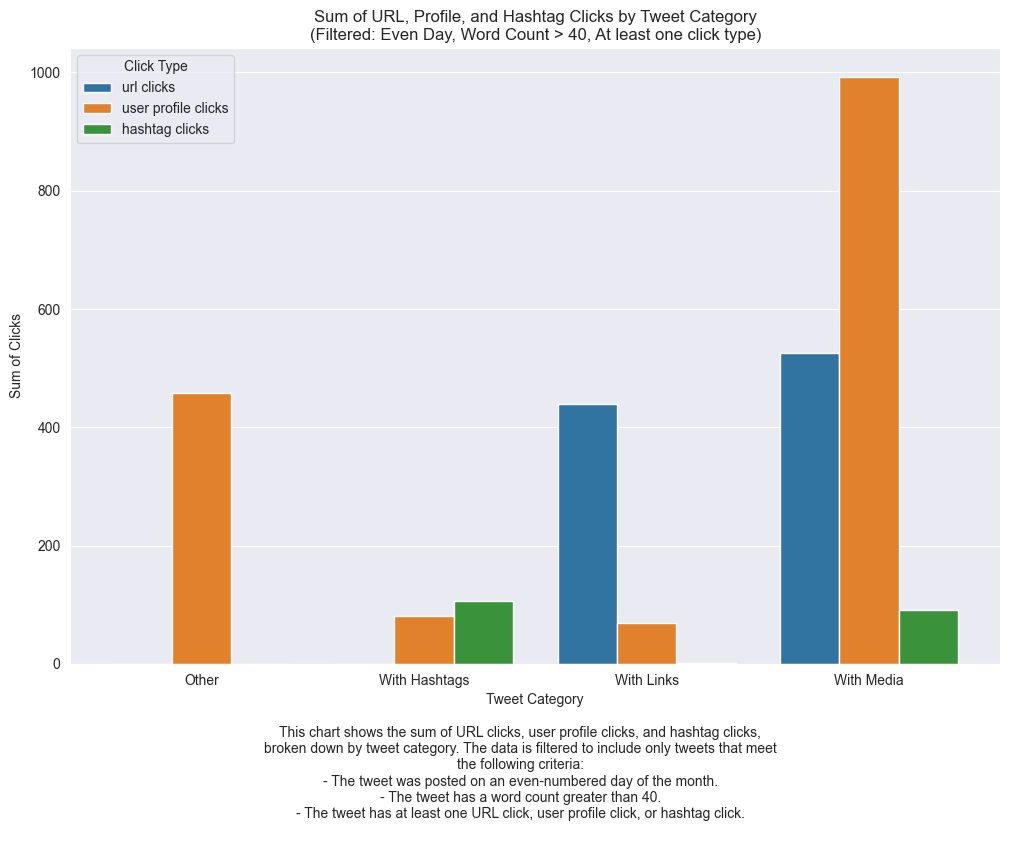

In [14]:
# Create the clustered bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='Total Clicks', hue='Click Type', data=melted_data)

# Add titles and labels
plt.title('Sum of URL, Profile, and Hashtag Clicks by Tweet Category\n(Filtered: Even Day, Word Count > 40, At least one click type)')
plt.xlabel('Tweet Category')
plt.ylabel('Sum of Clicks')
plt.xticks(rotation=0)
plt.legend(title='Click Type')

# Add a description
description = """
This chart shows the sum of URL clicks, user profile clicks, and hashtag clicks,
broken down by tweet category. The data is filtered to include only tweets that meet
the following criteria:
- The tweet was posted on an even-numbered day of the month.
- The tweet has a word count greater than 40.
- The tweet has at least one URL click, user profile click, or hashtag click.
"""
plt.figtext(0.5, -0.1, description, ha="center", fontsize=10, wrap=True)
plt.plot()